In [1]:
import numpy as np
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("..")
from config import *
from scripts.SNR import SNR
from scripts.plot_images import plot_images
from scripts.plot_line_defect import plot_line
from scripts.Amp_phase_func import *
from scripts.plot_rect import *
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
loaded_node_temp= pd.read_pickle(Dict_temp_0_182)
loaded_nodes_loc=pd.read_pickle(Nodes_loc_0_182)
df= pd.read_csv(result_df)
df.head()

,df_0_028.csv_Amplitude,df_0_028.csv_Phase,df_0_038.csv_Amplitude,df_0_038.csv_Phase,df_0_055.csv_Amplitude,df_0_055.csv_Phase,df_0_071.csv_Amplitude,df_0_071.csv_Phase,df_0_093.csv_Amplitude,df_0_093.csv_Phase,df_0_126.csv_Amplitude,df_0_126.csv_Phase,df_0_182.csv_Amplitude,df_0_182.csv_Phase
0,0.127052,0.968112,0.005076,1.237575,0.078934,0.745113,0.111393,0.731411,0.135850,0.779373,0.140204,0.768051,0.118773,0.806604
1,0.127871,0.964349,0.005514,1.108180,0.078420,0.754151,0.110951,0.739843,0.135515,0.788076,0.140043,0.778478,0.118951,0.822127
2,0.127781,0.964507,0.005469,1.111743,0.078435,0.754137,0.110961,0.739842,0.135530,0.788047,0.140064,0.778372,0.118972,0.821818
3,0.128575,0.962778,0.005919,1.068277,0.078197,0.755935,0.110815,0.741456,0.135430,0.789716,0.140000,0.780440,0.118978,0.825055
4,0.128304,0.963362,0.005760,1.081913,0.078277,0.755404,0.110862,0.740991,0.135462,0.789237,0.140024,0.779832,0.118982,0.824058


In [3]:

len(loaded_nodes_loc)

8887

In [4]:
len(loaded_node_temp[0.0999])

8887

In [5]:
temperature =[]
# Using a loop
for key in loaded_node_temp:
    if len(loaded_node_temp[key]) >= 2:  # Make sure the list has at least 2 elements
        temperature .append(loaded_node_temp[key][1])

print(temperature )


[25.000163332552578, 25.000782199312045, 25.002089688376337, 25.004271614131422, 25.00747429576227, 25.011809726053006, 25.017359084698263, 25.02417522563002, 25.032284554867516, 25.0416885748167, 25.052365277422815, 25.064270505731255, 25.077339360643435, 25.091487700109546, 25.10661375722778, 25.12259988883604, 25.139314455308487, 25.156613824184383, 25.174344484162866, 25.192345251375123, 25.210449546350752, 25.228487717505878, 25.246289385143275, 25.26368577876918, 25.280512039925203, 25.296609462653986, 25.31182764412065, 25.326026518765353, 25.339078250628926, 25.35086896014385, 25.36130026368023, 25.370290606450038, 25.37777637196061, 25.383712754036875, 25.388074380456253, 25.390855680419286, 25.39207099137038, 25.391754404039997, 25.38995934795723, 25.386757923036637, 25.382239986127928, 25.376512004590058, 25.369695691970286, 25.361926443693317, 25.353351593258324, 25.34412851176999, 25.33442257566107, 25.324405029173057, 25.31425076952432, 25.304136083697156, 25.294236366397

In [6]:
amplitude_data = df["df_0_028.csv_Amplitude"].values
phase_data = df["df_0_028.csv_Phase"].values

In [7]:
len(amplitude_data)

8887

In [8]:
amp= amplitude_data[2]
ph= phase_data[2]
time = list(loaded_node_temp.keys())

In [11]:
# Reshape the data for sklearn LinearRegression
X = np.array(time).reshape(-1, 1)
y = temperature

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)


b = model.coef_[0]  # Linear drift coefficient (b)
a = model.intercept_  # Baseline temperature (a)

print("Baseline temperature (a):", a)
print("Linear drift coefficient (b):", b)


Baseline temperature (a): 25.15351117975722
Linear drift coefficient (b): 0.02952734427559179


In [13]:
predicted_temperature = a + b * np.array(time)

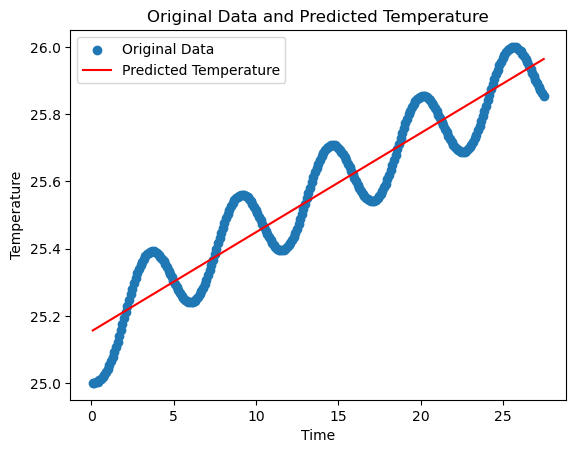

In [14]:
# Plot the original data points and the predicted temperature line
plt.scatter(time, temperature, label='Original Data')
plt.plot(time, predicted_temperature, color='red', label='Predicted Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Original Data and Predicted Temperature')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the function Tm(t) = a + bt + ∑∆Tn sin(nωt + ϕn) for n = 1, 3, 5, 7
def tm_function(t, a, b, *params):
    result = a + b * t
    for n in range(1, len(params) + 1):
        delta_Tn = params[n - 1]
        phi_n = params[n]
        result += delta_Tn * np.sin(n * omega * t + phi_n)
    return result

# Load your data
# Replace these arrays with your actual data
time = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])  # Example time points
data = np.array([1.0, 1.2, 1.4, 1.5, 1.8, 2.0])  # Example Tm(t) values

# Initial guess for parameters
initial_guess = [1.0, 1.0] + [0.0, 0.0, 0.0, 0.0]  # [a, b, ∆T1, ∆T3, ∆T5, ∆T7, ϕ1, ϕ3, ϕ5, ϕ7]

# Angular frequency
omega = 2 * np.pi

# Perform the curve fitting
popt, _ = curve_fit(tm_function, time, data, p0=initial_guess)

# Extract the fitted coefficients
a_fit = popt[0]
b_fit = popt[1]

print("Fitted 'a' coefficient:", a_fit)
print("Fitted 'b' coefficient:", b_fit)

# Generate fitted curve using the fitted coefficients
fitted_curve = tm_function(time, *popt)

# Plot the original data and the fitted curve
plt.plot(time, data, 'bo', label='Original Data')
plt.plot(time, fitted_curve, 'r-', label='Fitted Curve')
plt.xlabel('Time')
plt.ylabel('Tm(t)')
plt.legend()
plt.show()


In [ ]:
import sympy as sp

# Define symbols and variables
t = sp.symbols('t')
n = sp.Symbol('n', integer=True)
omega = sp.Symbol('omega')
delta_T = sp.Function('delta_T')(n)
phi = sp.Function('phi')(n)

# Define the Fourier series representation
Tm_fourier = sp.Sum(delta_T * sp.sin(n * omega * t + phi), (n, 1, sp.oo))

# Calculate average of Tm(t) over one period (a)
Tm_average = 1 / (2 * sp.pi) * sp.integrate(Tm_fourier, (t, 0, 2 * sp.pi))

# Calculate coefficient of t in the Fourier series (b)
Tm_coeff_t = Tm_fourier.coeff(t, 1)

# Print the calculated values for a and b
print("Calculated value of a:")
print(Tm_average)
print("\nCalculated value of b:")
print(Tm_coeff_t)


Calculated value of a:
Integral(Sum(delta_T(n)*sin(n*omega*t + phi(n)), (n, 1, oo)), (t, 0, 2*pi))/(2*pi)

Calculated value of b:
0


Fitted 'a' value: 0.5100004357747442
Fitted 'b' value: 0.19799991282680032


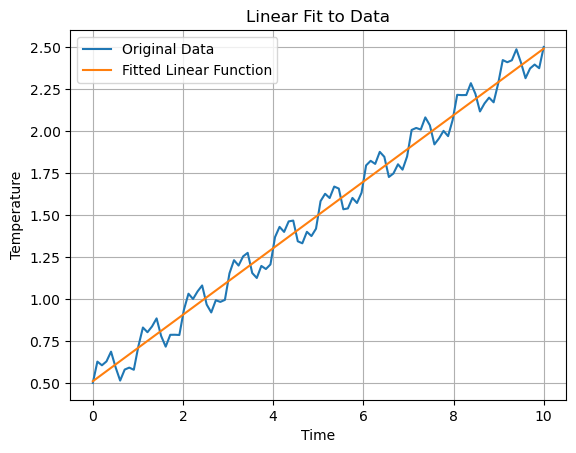

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def linear_function(t, a, b):
    return a + b * t

# Generate some example data
t_data = np.linspace(0, 10, 100)
temperature_data = linear_function(t_data, 0.5, 0.2) + 0.1 * np.sin(2 * np.pi * t_data) + 0.05 * np.sin(6 * np.pi * t_data)

# Fit the linear function to the data to get 'a' and 'b'
params, _ = curve_fit(linear_function, t_data, temperature_data)
a_fit, b_fit = params

print("Fitted 'a' value:", a_fit)
print("Fitted 'b' value:", b_fit)

# Plot the fitted linear function and the original data
plt.plot(t_data, temperature_data, label='Original Data')
plt.plot(t_data, linear_function(t_data, a_fit, b_fit), label='Fitted Linear Function')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Linear Fit to Data')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from scipy.optimize import minimize

# Simulated data
t = np.array([0, 1, 2, 3, 4, 5])  # Time points
Tm = np.array([10.1, 12.2, 14.3, 16.2, 18.5, 20.6])  # Measured temperature values

# Constants for Fourier components
delta_Tn = np.array([1, 2, 0.5])
omega = 2 * np.pi  # Modulated frequency
phi_n = np.array([0.1, 0.5, 1.2])

# Function to minimize (sum of squared errors)
def loss_function(coefficients):
    a, b = coefficients
    predicted_temps = a + b * t + np.sum(delta_Tn * np.sin(omega * t + phi_n))
    return np.sum((Tm - predicted_temps)**2)

# Initial guess for a and b
initial_guess = [1.0, 1.0]

# Perform optimization to find a and b
result = minimize(loss_function, initial_guess, method='Nelder-Mead')

# Extract optimized a and b
optimized_a, optimized_b = result.x

print("Optimized a:", optimized_a)
print("Optimized b:", optimized_b)


ValueError: operands could not be broadcast together with shapes (6,) (3,) 

In [ ]:
import numpy as np

# Simulated data
t = np.array([0, 1, 2, 3, 4, 5])  # Time points
Tm = np.array([10.1, 12.2, 14.3, 16.2, 18.5, 20.6])  # Measured temperature values

# Create the design matrix X
X = np.column_stack((np.ones_like(t), t))

# Perform linear regression
coefficients, residuals, rank, singular_values = np.linalg.lstsq(X, Tm, rcond=None)

# Extract optimized a and b
optimized_a, optimized_b = coefficients

print("Optimized a:", optimized_a)
print("Optimized b:", optimized_b)


Optimized a: 10.080952380952379
Optimized b: 2.0942857142857156


In [ ]:
import numpy as np
from scipy.optimize import least_squares

# Simulated data
t = np.array([0, 1, 2, 3, 4, 5])  # Time points
Tm = np.array([10.1, 12.2, 14.3, 16.2, 18.5, 20.6])  # Measured temperature values

# Constants for Fourier components
delta_Tn = np.array([1, 2, 0.5])
omega = 2 * np.pi  # Modulated frequency
phi_n = np.array([0.1, 0.5, 1.2])

# Function to minimize
def model(params, t):
    a, b = params[:2]
    Fourier_terms = np.sum(delta_Tn * np.sin(np.arange(1, 8, 2) * omega * t + phi_n), axis=0)
    return a + b * t + Fourier_terms

def residual(params, t, data):
    return data - model(params, t)

# Initial guess for parameters [a, b]
initial_params = [1.0, 1.0]

# Perform optimization
result = least_squares(residual, initial_params, args=(t, Tm))

# Extract optimized parameters
optimized_a, optimized_b = result.x

print("Optimized a:", optimized_a)
print("Optimized b:", optimized_b)


ValueError: operands could not be broadcast together with shapes (4,) (6,) 

In [ ]:
import numpy as np
from scipy.optimize import least_squares

# Simulated data
t = np.array([0, 1, 2, 3, 4, 5])  # Time points
Tm = np.array([10.1, 12.2, 14.3, 16.2, 18.5, 20.6])  # Measured temperature values

# Constants for Fourier components
delta_Tn = np.array([1, 2, 0.5])
omega = 2 * np.pi  # Modulated frequency
phi_n = np.array([0.1, 0.5, 1.2])

# Function to minimize
def model(params, t):
    a, b = params[:2]
    Fourier_terms = np.sum(delta_Tn * np.sin(np.arange(1, 8, 2)[:, np.newaxis] * omega * t + phi_n[:, np.newaxis]), axis=0)
    return a + b * t + Fourier_terms

def residual(params, t, data):
    return data - model(params, t)

# Initial guess for parameters [a, b]
initial_params = [1.0, 1.0]

# Perform optimization
result = least_squares(residual, initial_params, args=(t, Tm))

# Extract optimized parameters
optimized_a, optimized_b = result.x

print("Optimized a:", optimized_a)
print("Optimized b:", optimized_b)


ValueError: operands could not be broadcast together with shapes (4,6) (3,1) 